### Import packages

In [1]:
import numpy as np
import yaml
from gmm_mi.gmm import GMM
from gmm_mi.gmm_mi import GMM_MI
from gmm_mi.data.synthetic_data import D3 as dataset
from gmm_mi.utils.plotting import plot_gmm_contours, histogram_estimates, plot_loss_curves

### Calculate the true MI of the synthetic model, and plot contours

True MI: 0.132 nats


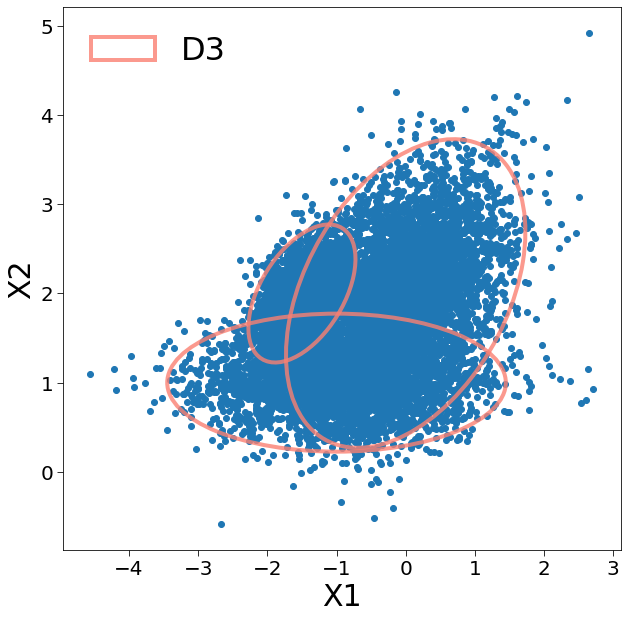

In [2]:
label = 'D3'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
print(f'True MI: {analytic:.3f} nats')
plot_gmm_contours(dataset, ls='-', label=label)

### Test on 500 trials

In [ ]:
N = 10000
random_states = 500
all_MI_estimates = np.zeros((random_states, 2))
save = True

# load parameters from yaml file and assign them to variables
# not the cleanest and safest way, but it should work
with open('./config_parameters.yml', 'rb') as f:
    conf = yaml.safe_load(f.read())
locals().update(conf)
init_type = "random_sklearn"
tol = 1e-6

# true GMM parameters
n_components = dataset.n_components 
true_weights = dataset.weights_
true_means = dataset.means_
true_covariances = dataset.covariances_

for r in range(random_states):
    # create different realisation of ground truth; note the different random_state each time
    X = GMM(n_components=n_components, weights_init=true_weights, 
                      means_init=true_means, covariances_init=true_covariances, 
                      random_state=r).sample(N)[0]
    
    MI_mean, MI_std = GMM_MI(X, n_folds=n_folds, n_inits=n_inits, init_type=init_type, reg_covar=reg_covar, 
                             tol=tol, max_iter=max_iter, bootstrap=bootstrap, n_bootstrap=n_bootstrap, 
                             MC_samples=MC_samples, fixed_components=fixed_components, 
                             fixed_components_number=n_components, select_c=select_c, patience=patience, 
                             verbose=verbose, return_lcurves=return_lcurves)   

    # print for debugging purposes
    if r % 100 == 0 and r > 0:
        print(f'{r/random_states}%') 
    
    # store results
    all_MI_estimates[r, 0] = MI_mean
    all_MI_estimates[r, 1] = MI_std

    if save:
        np.save(f'./results/MI_{label}_{random_states}.npy', all_MI_estimates)

0.2%


### Evaluate MI bias

In [ ]:
# load, in case you saved it
random_states = 501
all_MI_estimates = np.load(f'./results/MI_{label}_{random_states}.npy')

In [ ]:
show_title=True
show_legend=True
hide_ylabel=False
labelfontsize=40
legendsize=40

biases, red_chi2, df = plot_bias_chi2_histogram(all_MI_estimates, analytic=analytic, 
                                                show_title=show_title, show_legend=show_legend, 
                                                hide_ylabel=hide_ylabel, labelfontsize=labelfontsize, 
                                                ds=label, legendsize=legendsize)